In [67]:
import pandas as pd
import numpy as np

# Brittany cleans:
customer_df = pd.read_csv('data/twm_customer.csv', sep=';')
savings_acct_df = pd.read_csv('data/twm_savings_acct.csv', sep=';')
savings_tran_df = pd.read_csv('data/twm_savings_tran.csv', sep=';')
transactions_df = pd.read_csv('data/twm_transactions.csv', sep=';')

## Review Data Information and Types

In [68]:
# Display the first 5 rows of the Dataframe
customer_df.head()

,cust_id,income,age,years_with_bank,nbr_children,gender,marital_status,name_prefix,first_name,last_name,street_nbr,street_name,postal_code,city_name,state_code
0,1362691,26150,46,5,1,M,2,,Donald ...,Marek ...,8298,Second ...,89194,Las Vegas,NV
1,1362487,6605,71,1,0,M,2,,ChingDyi ...,Moussavi ...,10603,Daffodil ...,90159,Los Angeles,CA
2,1363160,18548,38,8,0,F,1,,Rosa ...,Johnston ...,8817,Figueroa ...,90024,Los Angeles,CA
3,1362752,47668,54,3,0,F,1,,Lisa ...,Martin ...,676,Humble ...,90172,Los Angeles,CA
4,1362548,44554,59,9,2,F,4,,Barbara ...,O'Malley ...,6578,C ...,10138,New York City,NY


In [81]:
customer_df.loc[customer_df['cust_id'] == 1362806]

,cust_id,income,age,years_with_bank,nbr_children,gender,marital_status,name_prefix,first_name,last_name,street_nbr,street_name,postal_code,city_name,state_code
511,1362806,39382,24,3,1,M,3,Mr.,Randy ...,McCarthy ...,15648,Juniper ...,60605,Chicago,IL


In [80]:
savings_acct_df.head(15)

,cust_id,acct_nbr,minimum_balance,acct_type,account_active,acct_start_date,acct_end_date,starting_balance,ending_balance
0,1363160,13631603,100,BS,Y,9.5.1988,NaN,113.04,122.54
1,1362487,13624873,500,MM,N,27.6.1994,25.8.1995,651.73,12.89
2,1362548,13625483,100,BS,Y,11.11.1986,NaN,250.24,254.02
3,1362752,13627523,100,BS,Y,20.2.1995,NaN,600.26,609.33
4,1363017,13630173,100,BS,N,27.4.1994,31.10.1995,2011.02,2901.35
5,1362609,13626093,500,MM,Y,22.6.1995,NaN,758.41,49.39
6,1363465,13634653,500,MM,Y,27.4.1994,NaN,573.48,590.92
7,1363078,13630783,100,BS,Y,26.8.1992,NaN,127.81,596.38
8,1362588,13625883,100,BS,Y,20.10.1990,NaN,252.24,9.71
9,1363343,13633433,500,MM,Y,14.3.1995,NaN,603.82,2007.65


In [70]:
savings_tran_df.head()

,cust_id,tran_id,tran_amt,principal_amt,interest_amt,new_balance,tran_date,tran_time,channel,tran_code
0,1363481,26,136.03,136.03,0.00,1521.57,26.10.1995,84111,A,DP
1,1362746,1,2.83,0.00,2.83,2265.90,31.1.1995,235959,,IN
2,1363251,11,13.56,0.00,13.56,5438.90,30.4.1995,235959,,IN
3,1362542,4,0.76,0.00,0.76,610.92,30.4.1995,235959,,IN
4,1363387,11,148.69,148.69,0.00,470.05,21.5.1995,144736,E,DP


In [71]:
transactions_df.head()

,tran_id,acct_nbr,tran_amt,principal_amt,interest_amt,new_balance,tran_date,tran_time,channel,tran_code
0,27,13625623,0.00,0.00,0.0,3753.34,21.10.1995,121656,A,IQ
1,97,13628392,0.00,0.00,0.0,254.49,5.2.1995,153053,V,IQ
2,21,13630842,-97.57,-97.57,0.0,3819.56,23.7.1995,0,P,WD
3,44,13631412,-0.15,-0.15,0.0,224.05,30.1.1995,0,,FK
4,31,13625722,0.00,0.00,0.0,240.55,25.1.1995,204521,B,IQ


In [72]:
# Get information about the columns and data types 
customer_df.info()
savings_acct_df.info()
savings_tran_df.info()
transactions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 747 entries, 0 to 746
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   cust_id          747 non-null    int64 
 1   income           747 non-null    int64 
 2   age              747 non-null    int64 
 3   years_with_bank  747 non-null    int64 
 4   nbr_children     747 non-null    int64 
 5   gender           747 non-null    object
 6   marital_status   747 non-null    int64 
 7   name_prefix      747 non-null    object
 8   first_name       747 non-null    object
 9   last_name        747 non-null    object
 10  street_nbr       747 non-null    int64 
 11  street_name      747 non-null    object
 12  postal_code      747 non-null    int64 
 13  city_name        747 non-null    object
 14  state_code       747 non-null    object
dtypes: int64(8), object(7)
memory usage: 87.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421 entries, 0 to 420
Data co

## Review Null Values for Each Table

In [73]:
#check for null values in customer_df
customer_df.isnull().sum()  

cust_id            0
income             0
age                0
years_with_bank    0
nbr_children       0
gender             0
marital_status     0
name_prefix        0
first_name         0
last_name          0
street_nbr         0
street_name        0
postal_code        0
city_name          0
state_code         0
dtype: int64

In [74]:
#check for null values in savings_acct_df
savings_acct_df.isnull().sum()   

cust_id               0
acct_nbr              0
minimum_balance       0
acct_type             0
account_active        0
acct_start_date       0
acct_end_date       375
starting_balance      0
ending_balance        0
dtype: int64

In [75]:
#check for null values in savings_trans_df
savings_tran_df.isnull().sum()  

cust_id          0
tran_id          0
tran_amt         0
principal_amt    0
interest_amt     0
new_balance      0
tran_date        0
tran_time        0
channel          0
tran_code        0
dtype: int64

In [76]:
#check for null values in transactions_df
transactions_df.isnull().sum() 

tran_id          0
acct_nbr         0
tran_amt         0
principal_amt    0
interest_amt     0
new_balance      0
tran_date        0
tran_time        0
channel          0
tran_code        0
dtype: int64

In [77]:
#Further explore null values in savings_acct_df
null_values_df = savings_acct_df[savings_acct_df.isnull().any(axis=1)]
null_values_df.head(10)

,cust_id,acct_nbr,minimum_balance,acct_type,account_active,acct_start_date,acct_end_date,starting_balance,ending_balance
0,1363160,13631603,100,BS,Y,9.5.1988,NaN,113.04,122.54
2,1362548,13625483,100,BS,Y,11.11.1986,NaN,250.24,254.02
3,1362752,13627523,100,BS,Y,20.2.1995,NaN,600.26,609.33
5,1362609,13626093,500,MM,Y,22.6.1995,NaN,758.41,49.39
6,1363465,13634653,500,MM,Y,27.4.1994,NaN,573.48,590.92
7,1363078,13630783,100,BS,Y,26.8.1992,NaN,127.81,596.38
8,1362588,13625883,100,BS,Y,20.10.1990,NaN,252.24,9.71
9,1363343,13633433,500,MM,Y,14.3.1995,NaN,603.82,2007.65
10,1362853,13628533,500,MM,Y,10.6.1995,NaN,918.64,1025.23
11,1363404,13634043,100,BS,Y,22.2.1995,NaN,114.29,550.73


##### The savings_acct_df has 375 null values out of 421 rows under the acct_end_date variable. I anticipate that these null rows are due to accounts still being active and therefore not having a closure data. Therefore those particular row values will be removed.

In [26]:
#Drop null values for the variable acct_end_date in the savings_acct_df table
savings_acct_df.dropna(subset=['acct_end_date'], inplace=True)

## Check for Duplicate Values

In [54]:
# check for duplicates based on all columns
customer_df_duplicates = customer_df[customer_df.duplicated()]

# print the duplicate rows
print(customer_df_duplicates)

Empty DataFrame
Columns: [cust_id, income, age, years_with_bank, nbr_children, gender, marital_status, name_prefix, first_name, last_name, street_nbr, street_name, postal_code, city_name, state_code]
Index: []


In [55]:
# check for duplicates based on all columns
savings_acct_df_duplicates = savings_acct_df[savings_acct_df.duplicated()]

# print the duplicate rows
print(savings_acct_df_duplicates)

Empty DataFrame
Columns: [cust_id, acct_nbr, minimum_balance, acct_type, account_active, acct_start_date, acct_end_date, starting_balance, ending_balance]
Index: []


In [56]:
# check for duplicates based on all columns
savings_tran_df_duplicates = savings_tran_df[savings_tran_df.duplicated()]

# print the duplicate rows
print(savings_tran_df_duplicates)

Empty DataFrame
Columns: [cust_id, tran_id, tran_amt, principal_amt, interest_amt, new_balance, tran_date, tran_time, channel, tran_code]
Index: []


In [57]:
# check for duplicates based on all columns
transactions_df_duplicates = transactions_df[transactions_df.duplicated()]

# print the duplicate rows
print(transactions_df_duplicates)

Empty DataFrame
Columns: [tran_id, acct_nbr, tran_amt, principal_amt, interest_amt, new_balance, tran_date, tran_time, channel, tran_code]
Index: []


## Review Descriptive Stats for Each Table

In [27]:
# Get descriptive stats for customer_df
customer_df.describe()

,cust_id,income,age,years_with_bank,nbr_children,marital_status,street_nbr,postal_code
count,7.470000e+02,747.000000,747.000000,747.000000,747.000000,747.000000,747.000000,747.000000
mean,1.362991e+06,22728.281124,42.479250,3.907631,0.714859,1.882195,8523.109772,59502.690763
std,2.925255e+02,22207.221405,19.114879,2.675634,1.103410,0.892051,5219.488263,31205.926508
min,1.362480e+06,0.000000,13.000000,0.000000,0.000000,1.000000,196.000000,2149.000000
25%,1.362732e+06,7118.500000,28.000000,2.000000,0.000000,1.000000,4295.500000,33145.000000
50%,1.362993e+06,17242.000000,42.000000,4.000000,0.000000,2.000000,8001.000000,64132.000000
75%,1.363244e+06,31338.000000,56.000000,6.000000,1.000000,2.000000,12039.000000,90082.000000
max,1.363495e+06,144157.000000,89.000000,9.000000,5.000000,4.000000,19940.000000,98186.000000


In [66]:
# Get descriptive stats for savings_acct_df
savings_acct_df.describe()

,cust_id,acct_nbr,minimum_balance,starting_balance,ending_balance
count,4.600000e+01,4.600000e+01,46.000000,46.000000,46.000000
mean,1.363027e+06,1.363028e+07,160.869565,434.180435,891.795000
std,2.958930e+02,2.958930e+03,145.263379,496.569721,1010.429729
min,1.362487e+06,1.362487e+07,100.000000,104.780000,8.210000
25%,1.362753e+06,1.362753e+07,100.000000,143.302500,164.467500
50%,1.363059e+06,1.363059e+07,100.000000,261.975000,450.120000
75%,1.363254e+06,1.363254e+07,100.000000,488.267500,1277.285000
max,1.363493e+06,1.363493e+07,500.000000,2167.050000,4262.930000


In [29]:
# Get descriptive stats for savings_tran_df
savings_tran_df.describe()

,cust_id,tran_id,tran_amt,principal_amt,interest_amt,new_balance
count,1.118900e+04,11189.000000,11189.000000,11189.000000,11189.000000,11189.000000
mean,1.362988e+06,16.113504,14.458362,13.628621,0.829741,1229.467968
std,2.979129e+02,11.024730,221.971173,222.003741,2.856393,2256.670395
min,1.362480e+06,1.000000,-2495.880000,-2495.880000,0.000000,0.070000
25%,1.362720e+06,7.000000,-0.750000,-0.750000,0.000000,238.480000
50%,1.362978e+06,14.000000,0.390000,0.000000,0.000000,562.040000
75%,1.363262e+06,23.000000,7.340000,0.000000,0.480000,1247.300000
max,1.363495e+06,62.000000,4478.610000,4478.610000,44.680000,26016.690000


In [30]:
# Get descriptive stats for transactions_df
transactions_df.describe()

,tran_id,acct_nbr,tran_amt,principal_amt,interest_amt,new_balance,tran_time
count,77580.000000,7.758000e+04,77580.000000,77580.000000,77580.000000,77580.000000,77580.000000
mean,38.228332,1.185674e+15,-7.748275,-8.509662,0.762784,571.571177,104277.077984
std,27.838521,2.000564e+15,312.684674,311.006502,4.427059,2158.948572,87527.030938
min,1.000000,1.362480e+07,-3312.410000,-3312.410000,0.000000,-17300.000000,0.000000
25%,15.000000,1.362824e+07,-100.000000,-100.000000,0.000000,0.000000,0.000000
50%,32.000000,1.363199e+07,-1.815000,-1.815000,0.000000,180.400000,110626.000000
75%,59.000000,4.561143e+15,0.170000,0.000000,0.000000,957.252500,184245.250000
max,155.000000,4.561143e+15,17464.520000,17300.000000,164.520000,29868.390000,235959.000000


## Plot Histogram and Scatterplots to Review Data Spread

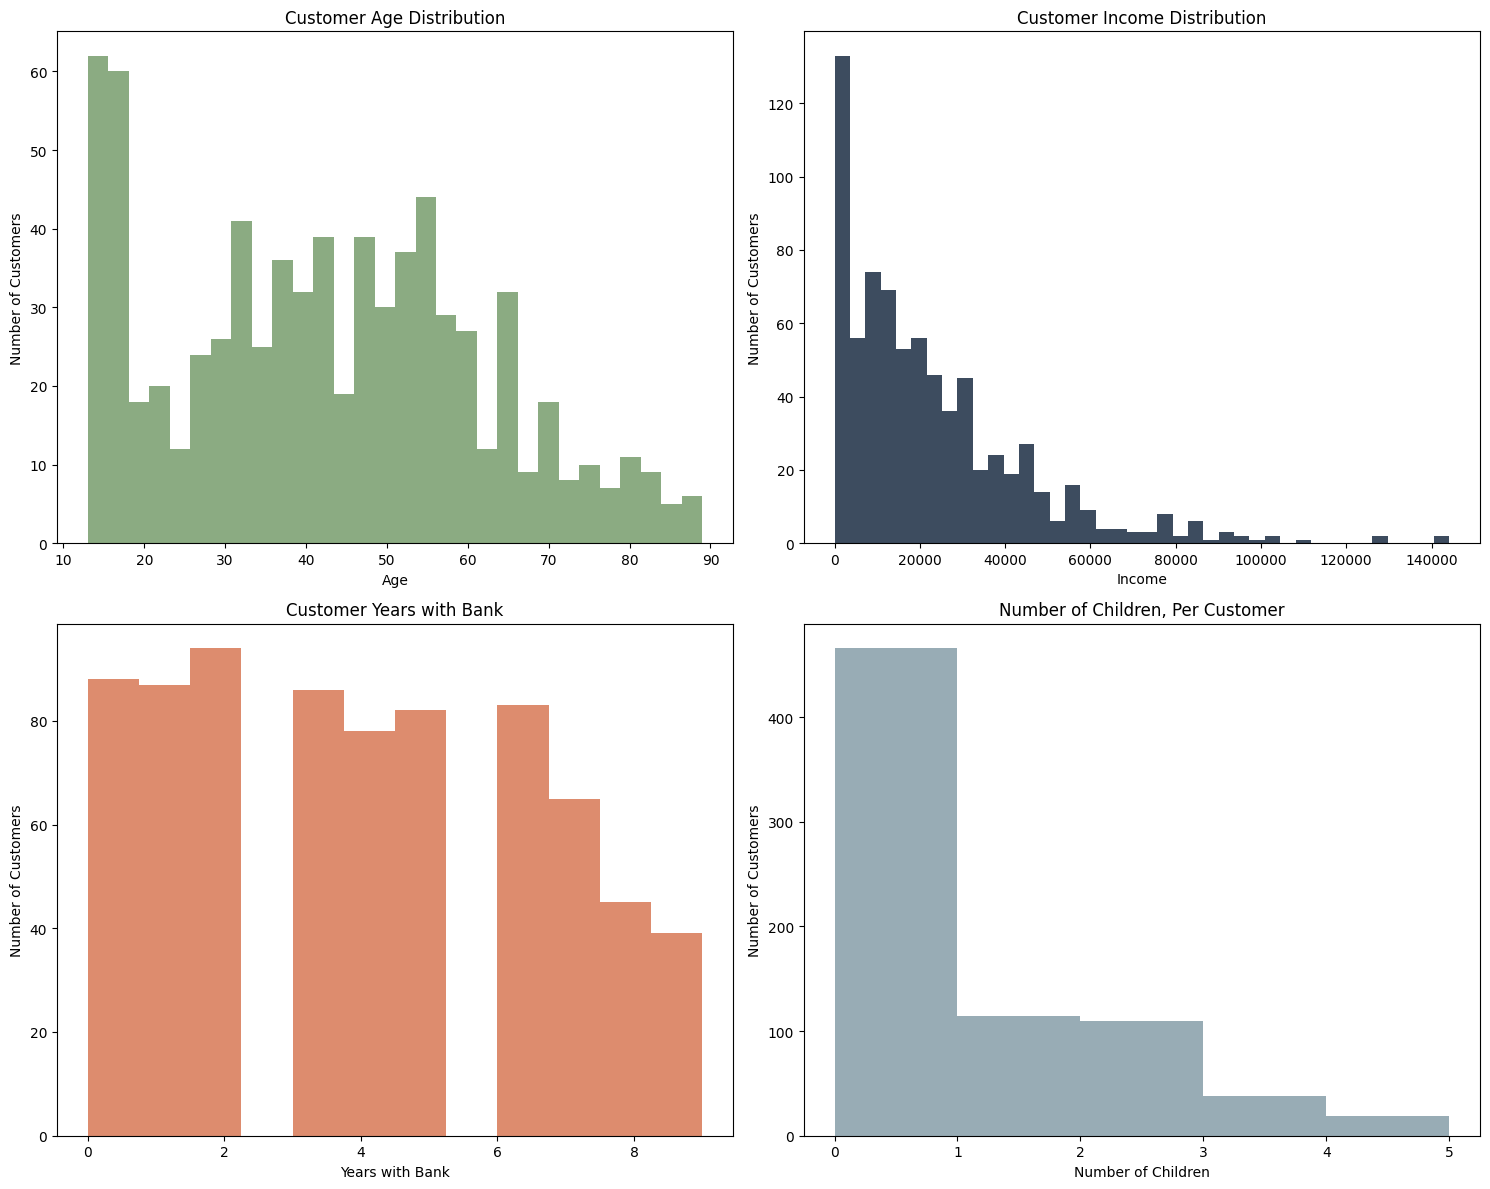

In [59]:
import matplotlib.pyplot as plt

# Create subplots with 2 rows and 2 columns
fig, axs = plt.subplots(2, 2, figsize=(15, 12))

# Plot histogram of age in the first subplot
axs[0, 0].hist(customer_df['age'], bins=30, color='#8BAB82')
axs[0, 0].set_title('Customer Age Distribution')
axs[0, 0].set_xlabel('Age')
axs[0, 0].set_ylabel('Number of Customers')

# Plot histogram of income in the second subplot
axs[0, 1].hist(customer_df['income'], bins=40, color='#3D4C5F')
axs[0, 1].set_title('Customer Income Distribution')
axs[0, 1].set_xlabel('Income')
axs[0, 1].set_ylabel('Number of Customers')

# Plot histogram of years_with_bank in the third subplot
axs[1, 0].hist(customer_df['years_with_bank'], bins=12, color='#DD8C6E')
axs[1, 0].set_title('Customer Years with Bank')
axs[1, 0].set_xlabel('Years with Bank')
axs[1, 0].set_ylabel('Number of Customers')

# Plot histogram of nbr_children in the fourth subplot
axs[1, 1].hist(customer_df['nbr_children'], bins=5, color='#98ACB5')
axs[1, 1].set_title('Number of Children, Per Customer')
axs[1, 1].set_xlabel('Number of Children')
axs[1, 1].set_ylabel('Number of Customers')
        
# Adjust layout to prevent overlapping labels
plt.tight_layout()

# Show the figure
plt.show()

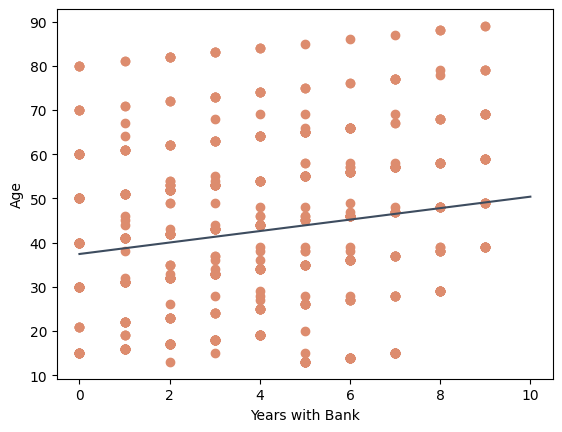

In [61]:
#Check to see if Age and Years with Bank have any correlation
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Create a scatter plot of years with bank and age
plt.scatter(customer_df['years_with_bank'], customer_df['age'], color='#DD8C6E')
plt.xlabel('Years with Bank')
plt.ylabel('Age')


# Plot the regression line
x = np.array([0, 10])
y = slope * x + intercept
plt.plot(x, y, color='#3D4C5F')

# Show the plot
plt.show()

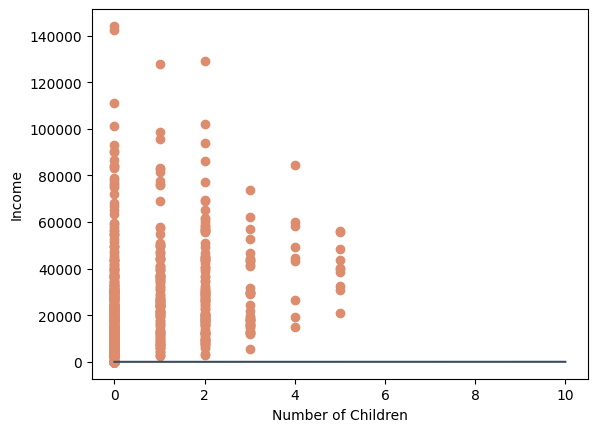

In [64]:
#Check to see if Number of Children and Income have any correlation
# Create a scatter plot of years with bank and age
plt.scatter(customer_df['nbr_children'], customer_df['income'], color='#DD8C6E')
plt.xlabel('Number of Children')
plt.ylabel('Income')


# Plot the regression line
x = np.array([0, 10])
y = slope * x + intercept
plt.plot(x, y, color='#3D4C5F')

# Show the plot
plt.show()